In [1]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

0.37636776937570043


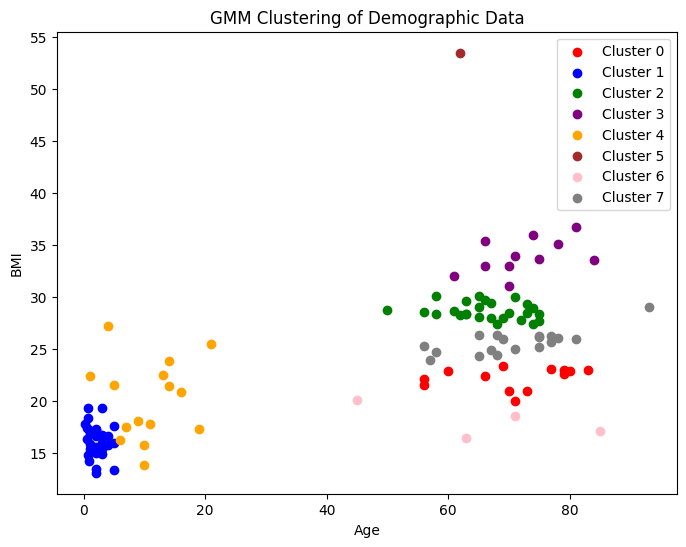

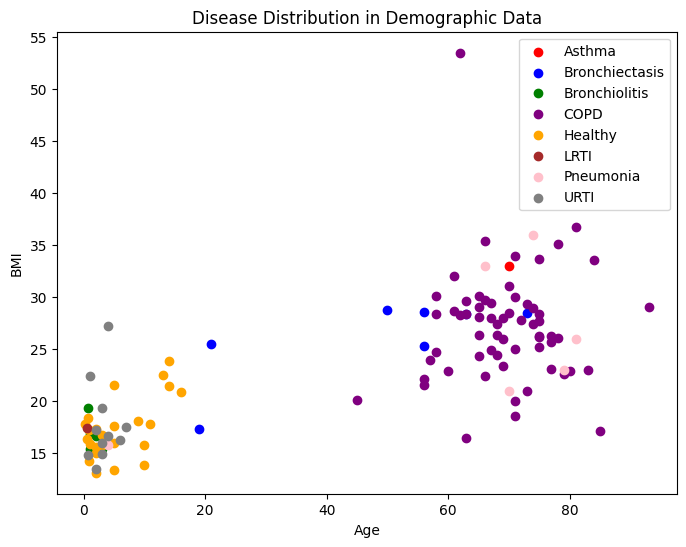

0.3881187007475026


In [2]:
# Load the data
data = pd.read_csv('data/data_complete.csv')

# create a dataframe with sample data

data = data[['pid', 'age', 'bmi', 'disease']].dropna()
data = data.groupby('pid').first().reset_index()
features = data[['age', 'bmi']]
disease_array = data['disease'].values

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

gmm = GaussianMixture(n_components=8, random_state=42, init_params='k-means++')
gmm.fit(scaled_features)


cluster_labels = gmm.predict(scaled_features)
print(metrics.silhouette_score(scaled_features, cluster_labels))
data['cluster'] = cluster_labels

plt.figure(figsize=(8, 6))

# Color mapping for clusters
color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange', 5: 'brown', 6: 'pink', 7: 'gray'}

# Plot data points with color-coded clusters
for cluster_label, color in color_map.items():
    cluster_data = data[data['cluster'] == cluster_label]
    plt.scatter(cluster_data['age'], cluster_data['bmi'], c=color, label=f'Cluster {cluster_label}')

plt.title('GMM Clustering of Demographic Data')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))

# Color mapping for clusters
color_map = {'Asthma': 'red', 'Bronchiectasis': 'blue', 'Bronchiolitis': 'green', 'COPD': 'purple', 'Healthy': 'orange', 'LRTI': 'brown', 'Pneumonia': 'pink', 'URTI': 'gray'}

# Plot data points with color-coded clusters
for disease, color in color_map.items():
    disease_data = data[data['disease'] == disease]
    plt.scatter(disease_data['age'], disease_data['bmi'], c=color, label=f'{disease}')

plt.title('Disease Distribution in Demographic Data')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()
print(metrics.completeness_score(disease_array, cluster_labels))